# **Plot Module**

In [1]:
from yaiv import plot
print(plot.__doc__)


YAIV | yaiv.plot

This module provides plotting utilities for visualizing eigenvalue spectra from periodic
systems. It supports electronic and vibrational spectra obtained from common ab initio
codes such as Quantum ESPRESSO and VASP.

Functions in this module are designed to work seamlessly with spectrum-like objects
(e.g., `Spectrum`, `ElectronBands`, `PhononBands`) and accept units-aware data.

The visualizations are based on `matplotlib`, and include options for:

- Plotting band structures and phonon spectra
- Automatically shifting eigenvalues (e.g., Fermi level)
- Detecting and patching discontinuities in the k-path
- Annotating high-symmetry points from KPOINTS or bands.in

Functions
---------
get_HSP_ticks(kpath, k_lattice=None)
    Computes tick positions and LaTeX labels for high-symmetry points along a k-path.

kpath(ax, kpath, k_lattice=None)
    Plots vertical lines and labels at high-symmetry points in a matplotlib Axes.

bands(electronBands, ax=None, ...)
    Plots the

---
>*The **documentation** of every function is accesible with the usual **shift + tab** shortcut.*
---

# Examples

In [3]:
from yaiv import plot
from yaiv import spectrum
import matplotlib.pyplot as plt

## Electronic bands

### Single spectrum plots

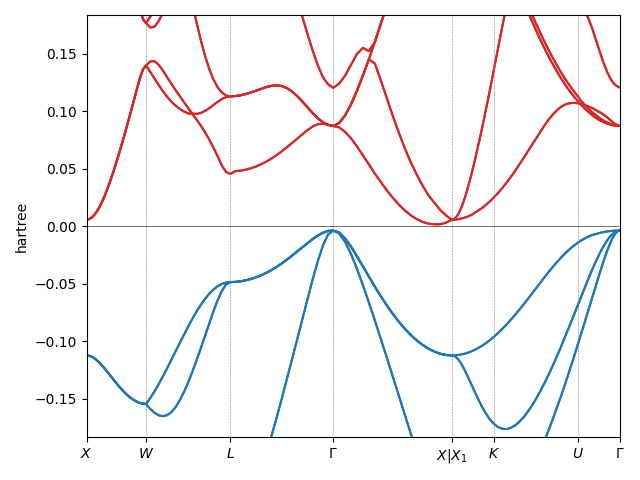

In [6]:
bands=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
bands.kpath=grep.kpath('data/qe/results_bands/Si.bands.pwi')
ax=plot.bands(bands,
           window=[-5,5]*ureg.eV)
plt.show()

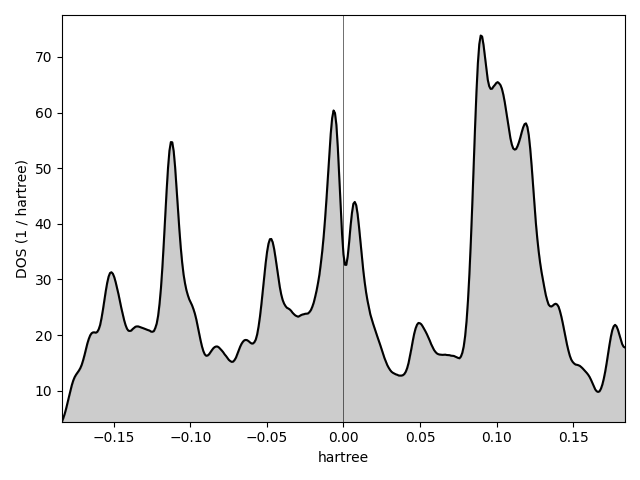

In [7]:
bands=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
ax=plot.DOS(bands,
           window=[-5,5]*ureg.eV,
           smearing=100*ureg.meV)
plt.show()

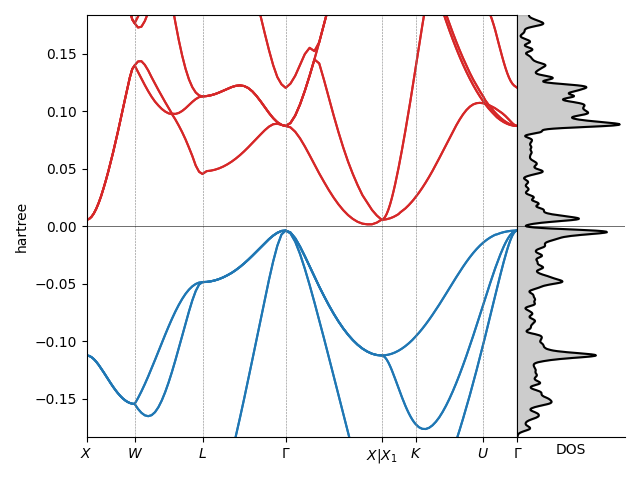

In [8]:
bands=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
bands.kpath=grep.kpath('data/qe/results_bands/Si.bands.pwi')
ax=plot.bandsDOS(bands,
           window=[-5,5]*ureg.eV)
plt.show()

### Multiple band structures

/u/51/gutierm2/unix/Software/enviroments/yaiv-dev/lib/python3.10/site-packages/ase/io/vasp_parsers/vasp_outcar_parsers.py:346: UserWarning: Non-collinear spin is not yet implemented. Setting magmom to x value.
  warn(


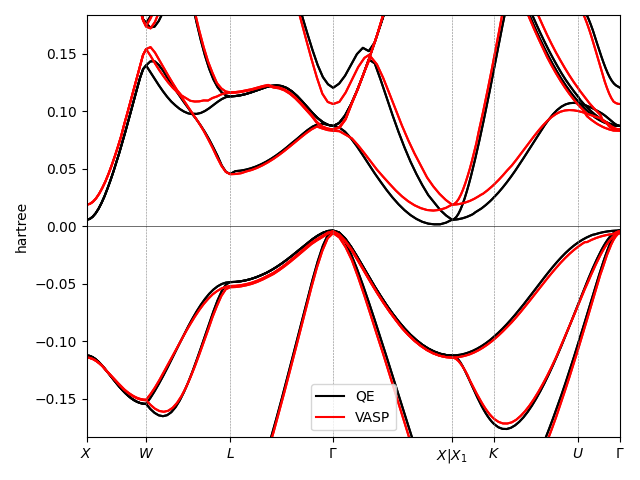

In [9]:
b1=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
b1.kpath=grep.kpath('data/qe/results_bands/Si.bands.pwi')
b2=spectrum.ElectronBands('data/vasp/RESULTS/OUTCAR_BS')
b2.kpath=grep.kpath('data/vasp/KPATH')
ax=plot.bands([b1,b2],
           window=[-5,5]*ureg.eV,
           labels=['QE','VASP'],
           colors=['black','red'])
plt.show()

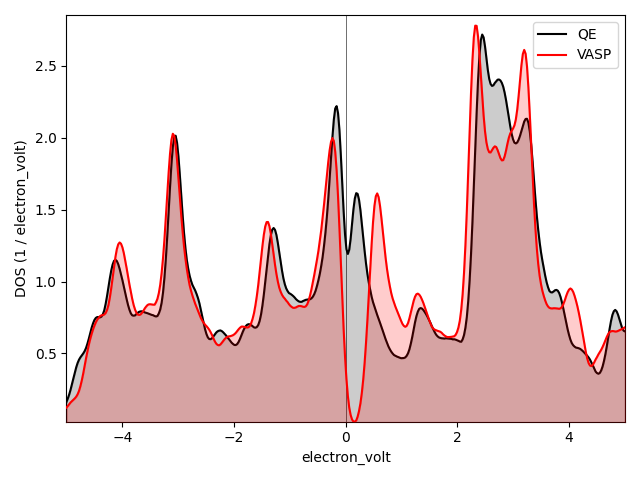

In [17]:
b1=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
b1.eigenvalues=b1.eigenvalues.to('eV')
b2=spectrum.ElectronBands('data/vasp/RESULTS/OUTCAR_BS')
ax=plot.DOS([b1,b2],
           window=[-5,5]*ureg.eV,
           labels=['QE','VASP'],
           colors=['black','red'],
           smearing=100*ureg.meV)
plt.show()

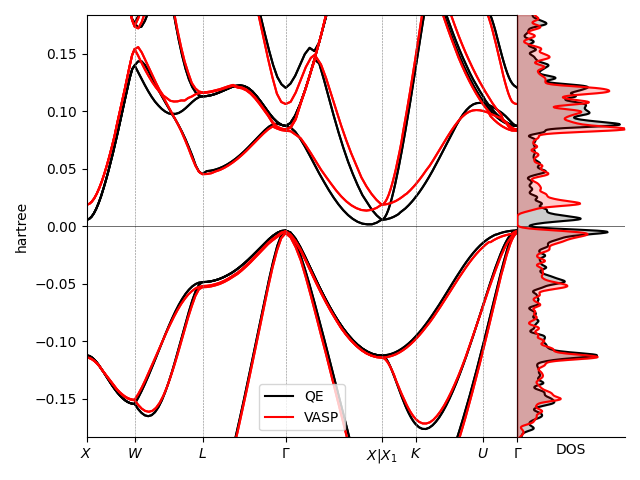

In [11]:
b1=spectrum.ElectronBands('data/qe/results_bands/bands.xml')
b1.kpath=grep.kpath('data/qe/results_bands/Si.bands.pwi')
b2=spectrum.ElectronBands('data/vasp/RESULTS/OUTCAR_BS')
b2.kpath=grep.kpath('data/vasp/KPATH')
ax=plot.bandsDOS([b1,b2],
           window=[-5,5]*ureg.eV,
           labels=['QE','VASP'],
           colors=['black','red'])
plt.show()

### Orbital projecions

/u/51/gutierm2/unix/Software/enviroments/yaiv-dev/lib/python3.10/site-packages/ase/io/vasp_parsers/vasp_outcar_parsers.py:346: UserWarning: Non-collinear spin is not yet implemented. Setting magmom to x value.
  warn(


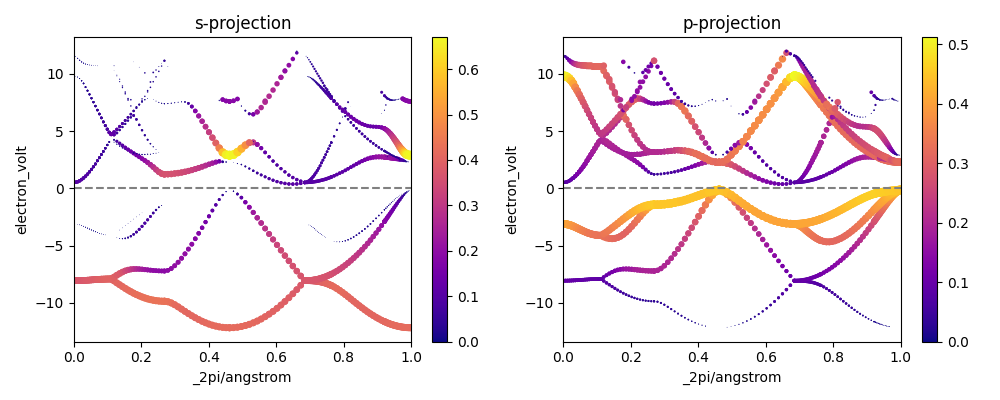

In [12]:
bands=spectrum.ElectronBands('data/vasp/RESULTS/OUTCAR_BS')
bands.kpath=grep.kpath('data/vasp/KPATH')
projections=grep.kpointsEnergies('data/vasp/RESULTS/PROCAR')

fig,ax = plt.subplots(1,2,figsize=(10,4))
x,scatter=bands.plot_fat(weights=projections.projections(l=0),
               ax=ax[0],
               shift=bands.fermi,
               size_change=True)
x.set_title('s-projection')
plt.colorbar(scatter)
x,scatter=bands.plot_fat(weights=projections.projections(l=1),
               ax=ax[1],
               shift=bands.fermi,
               size_change=True)
x.set_title('p-projection')
plt.colorbar(scatter)
for x in ax:
    x.axhline(0,linestyle='--',color='gray')
plt.tight_layout()
plt.show()

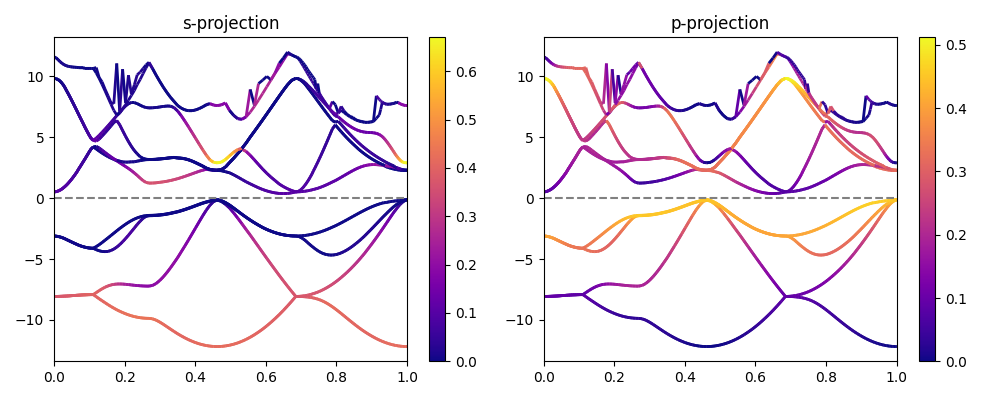

In [13]:
bands=spectrum.ElectronBands('data/vasp/RESULTS/OUTCAR_BS')
bands.kpath=grep.kpath('data/vasp/KPATH')
projections=grep.kpointsEnergies('data/vasp/RESULTS/PROCAR')

fig,ax = plt.subplots(1,2,figsize=(10,4))
x,scatter=bands.plot_color(weights=projections.projections(l=0),
               ax=ax[0],
               shift=bands.fermi)
x.set_title('s-projection')
plt.colorbar(scatter)
x,scatter=bands.plot_color(weights=projections.projections(l=1),
               ax=ax[1],
               shift=bands.fermi)
x.set_title('p-projection')
plt.colorbar(scatter)
for x in ax:
    x.axhline(0,linestyle='--',color='gray')
plt.tight_layout()
plt.show()

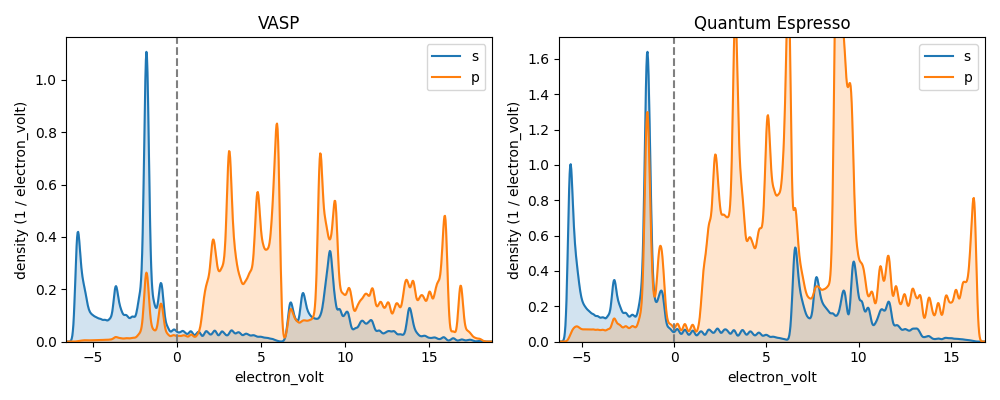

In [ ]:
vasp=grep.kpointsEnergies('data/vasp/RESULTS/PROCAR')
fermi=grep.fermi('data/vasp/RESULTS/OUTCAR_SCC')
vasp_s_DOS=spectrum.Density.from_data(x=vasp.energies,values=vasp.projections(l=0),center=fermi)
vasp_p_DOS=spectrum.Density.from_data(x=vasp.energies,values=vasp.projections(l=1),center=fermi)

qe=grep.kpointsEnergies('data/qe/results_proj/Si.proj.pwo')
fermi=grep.fermi('data/qe/results_scf/Si.scf.pwo')
qe_s_DOS=spectrum.Density.from_data(x=qe.energies,values=qe.projections(l=0),center=fermi)
qe_p_DOS=spectrum.Density.from_data(x=qe.energies,values=qe.projections(l=1),center=fermi)

fig,ax = plt.subplots(1,2,figsize=(10,4))
vasp_s_DOS.plot(ax[0],label='s')
vasp_p_DOS.plot(ax[0],label='p')
qe_s_DOS.plot(ax[1],label='s')
qe_p_DOS.plot(ax[1],label='p')

ax[0].set_title('VASP')
ax[1].set_title('Quantum Espresso')
for x in ax:
    x.axvline(0,linestyle='--',color='gray')
    x.legend()
plt.tight_layout()
plt.show()

## Phonon bands

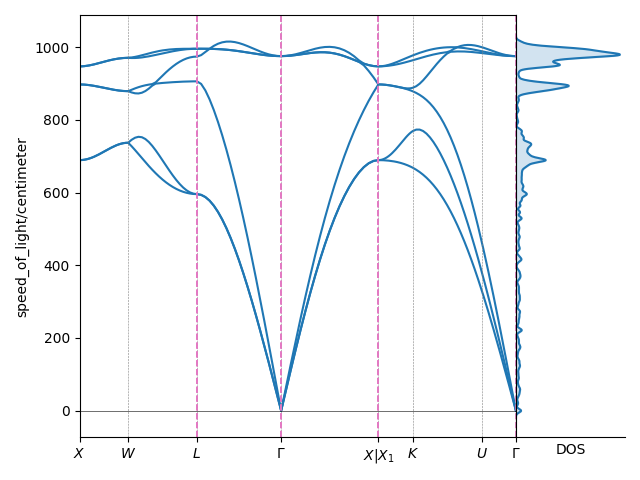

In [4]:
phonons=spectrum.PhononBands('data/qe/results_matdyn/Si.freq')
phonons.lattice=grep.lattice('data/qe/results_scf/scf.xml')
phonons.kpath=grep.kpath('data/qe/results_matdyn/matdyn.in')
ax=plot.phononsDOS(phonons,
                grid=[2,2,2], # This flag highlights your grid points in your path.
                )
plt.show()

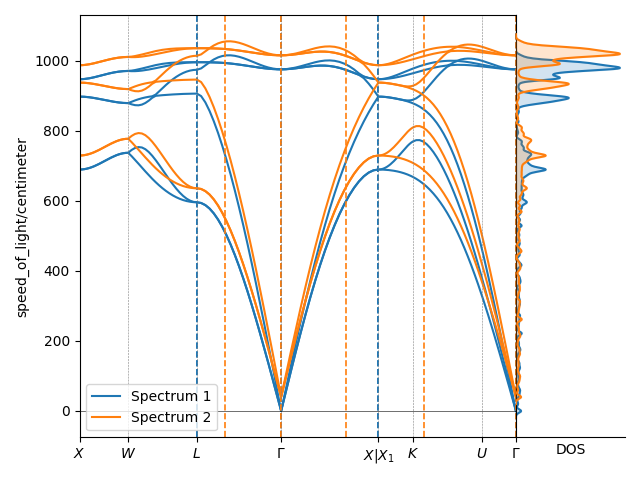

In [53]:
import copy

phonons1=spectrum.PhononBands('data/qe/results_matdyn/Si.freq')
phonons1.lattice=grep.lattice('data/qe/results_scf/scf.xml')
phonons1.kpath=grep.kpath('data/qe/results_matdyn/matdyn.in')
phonons2=copy.copy(phonons1)
phonons2.eigenvalues=phonons2.eigenvalues+40*ureg('c/cm')
ax=plot.phononsDOS([phonons1,phonons2],
                   grid=[[2,2,2],[3,3,3]], # You can compare different grids.
                   )